<a href="https://colab.research.google.com/github/MalihehGaroosiha/Barnet-Credit-Audit/blob/main/Barnet_Credit_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install sklearn

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns

# New Section

In [ ]:
df1=pd.read_csv("Purchasing Card Data 2014.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Purchasing Card Data 2014.csv'

In [ ]:
df1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014,306


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4562 non-null   object
 1   Account Description  4562 non-null   object
 2   Creditor             4562 non-null   object
 3   Transaction Date     4562 non-null   object
 4   JV Reference         4562 non-null   int64 
 5   JV Date              4562 non-null   object
 6   JV Value             4562 non-null   object
dtypes: int64(1), object(6)
memory usage: 249.6+ KB


**checked**

In [ ]:
df1.shape

(4562, 7)

In [ ]:
df1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014,306


In [ ]:
df1['Transaction Date'] = df1['Transaction Date'].astype(str)
df1['Transaction Date'] = pd.to_datetime(df1['Transaction Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df1['JV Value'] = df1['JV Value'].replace({',': ''}, regex=True).astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         4562 non-null   object        
 1   Account Description  4562 non-null   object        
 2   Creditor             4562 non-null   object        
 3   Transaction Date     4562 non-null   datetime64[ns]
 4   JV Reference         4562 non-null   int64         
 5   JV Date              4562 non-null   object        
 6   JV Value             4562 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [ ]:
df2=pd.read_csv("PCard Transactions 15-16.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         3864 non-null   object
 1   Account Description  3864 non-null   object
 2   Creditor             3864 non-null   object
 3   Journal Date         3864 non-null   object
 4   Journal Reference    3864 non-null   int64 
 5   Total                3864 non-null   object
dtypes: int64(1), object(5)
memory usage: 181.2+ KB


In [ ]:
df2.shape

(3864, 6)

In [ ]:
df2['Journal Date'] = df2['Journal Date'].astype(str)
df2['Journal Date'] = pd.to_datetime(df2['Journal Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df2['Total'] = df2['Total'].replace({',': ''}, regex=True).astype(float)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         3864 non-null   object        
 1   Account Description  3864 non-null   object        
 2   Creditor             3864 non-null   object        
 3   Journal Date         3864 non-null   datetime64[ns]
 4   Journal Reference    3864 non-null   int64         
 5   Total                3864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 181.2+ KB


In [ ]:
df2.tail(5)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
3859,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2015-12-16,6418,3.5
3860,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2015-11-17,6042,3.5
3861,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-01-20,6751,4.5
3862,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-21,7535,4.5
3863,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-31,7639,4.5


In [ ]:
df3=pd.read_csv("PCard 16-17-1.csv")

In [ ]:
df3.head(5)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Travelling Expenses,TICKETOFFICESALE,4/3/2016,7331,29.10
1,Assurance,Travelling Expenses,SELFSERVE TICKET,7/3/2016,7342,10.00
2,Assurance,Miscellaneous Expenses,BIRMINGHAM CC,22/04/2016,7871,69.00
3,Assurance,Miscellaneous Expenses,BIRMINGHAM CC,25/04/2016,7891,13.00
4,Assurance,Miscellaneous Expenses,D H C LTD,8/6/2016,8320,170.85


In [ ]:
df3.shape

(1604, 6)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         1604 non-null   object 
 1   Account Description  1604 non-null   object 
 2   Creditor             1604 non-null   object 
 3   Journal Date         1604 non-null   object 
 4   Journal Reference    1604 non-null   int64  
 5   Total                1604 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 75.3+ KB


In [ ]:
df3['Journal Date'] = df3['Journal Date'].astype(str)
df3['Journal Date'] = pd.to_datetime(df3['Journal Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         1604 non-null   object        
 1   Account Description  1604 non-null   object        
 2   Creditor             1604 non-null   object        
 3   Journal Date         1604 non-null   datetime64[ns]
 4   Journal Reference    1604 non-null   int64         
 5   Total                1604 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 75.3+ KB


**Renaming columns to defult **
Service Area,	Account Description,	Creditor,	Transaction Date,	Journal Reference,	Total

In [ ]:
dataframes = [df1, df2, df3]
rename_dict = {
    'Journal Date': 'Transaction Date',
    'JV Value': 'Total',
    'JV Reference': 'Journal Reference'
}

for df in dataframes:
    df.rename(columns=rename_dict, inplace=True)
for df in dataframes:
    df.drop(columns=['JV Date'], inplace=True, errors='ignore')
merged_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
merged_df.shape

(10030, 6)

In [ ]:
df=merged_df

In [ ]:
df.head()

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,6000.00
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,7,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,2014-04-15,381,306.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         10030 non-null  object        
 1   Account Description  10030 non-null  object        
 2   Creditor             10030 non-null  object        
 3   Transaction Date     10030 non-null  datetime64[ns]
 4   Journal Reference    10030 non-null  int64         
 5   Total                10030 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 470.3+ KB


In [ ]:
df.shape

(10030, 6)

In [ ]:
duplicates = df[df.duplicated(keep=False)]  # keep=False shows all duplicate rows including first occurrence

# Display the duplicate rows
print("Completely Duplicate Rows:")
print(duplicates)
duplicates.to_csv('duplicates.csv', index=False)

Completely Duplicate Rows:
                        Service Area             Account Description  \
2048                 Family Services  Equipment and Materials Purcha   
2049                 Family Services  Other Transfer Payments to Soc   
2050  Deputy Chief Operating Officer                     IT Services   
2051                       Education  Private Contractors - Third Pa   
2052                       Education  Equipment and Materials Repair   
...                              ...                             ...   
2883          Adults and Communities                         Postage   
2884          Adults and Communities                         Postage   
2885                    Street Scene  Equipment and Materials Purcha   
2886                    Street Scene  Equipment and Materials Purcha   
2887                 Family Services  Private Contractors - Third Pa   

                 Creditor Transaction Date  Journal Reference   Total  
2048      A  Y LOCKSMITHS       2014

In [ ]:
df = df.drop_duplicates()

# Display the DataFrame without duplicates
print("DataFrame without duplicate rows:")
print(df)

DataFrame without duplicate rows:
              Service Area             Account Description  \
0       Childrens Services                     IT Services   
1       Childrens Services                  Other Services   
2       Childrens Services  Equipment and Materials Repair   
3       Childrens Services  Equipment and Materials Repair   
4       Childrens Services  Building Repairs & Maintenance   
...                    ...                             ...   
10025        Public Health  Equipment and Materials Purcha   
10026        Commissioning                        Training   
10027        Commissioning                        Training   
10028        Commissioning                        Training   
10029  Regional Enterprise                        Training   

                    Creditor Transaction Date  Journal Reference    Total  
0              123-REG.CO.UK       2014-04-23                 93   143.81  
1         ACCESS EXPEDITIONS       2014-04-03                111  600

In [ ]:
df.to_csv('merged_data_without_dup.csv', index=False)

<ipython-input-228-51114ac21f8a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Service Area',data=df, palette='Set2' )


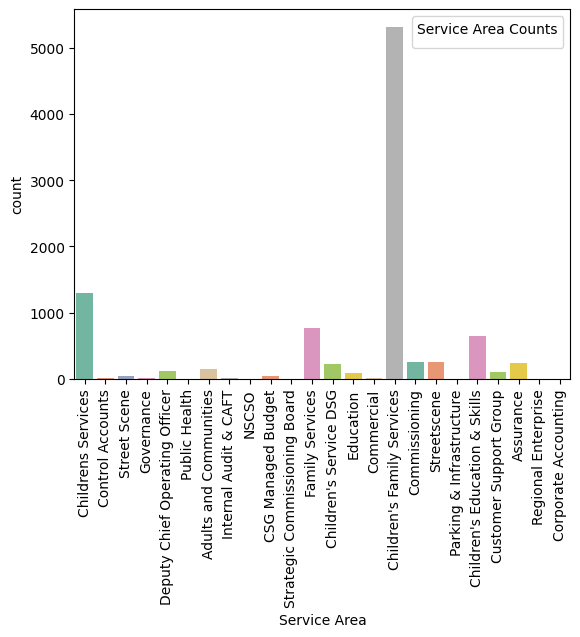

In [ ]:
sns.countplot(x='Service Area',data=df, palette='Set2' )
plt.xticks(rotation=90)
plt.legend(title="Service Area Counts", loc='upper right')

plt.show()


In [ ]:
df['Service Area'].unique()

array(['Childrens Services', 'Control Accounts', 'Street Scene',
       'Governance', 'Deputy Chief Operating Officer', 'Public Health',
       'Adults and Communities', 'Internal Audit & CAFT', 'NSCSO',
       'CSG Managed Budget', 'Strategic Commissioning Board',
       'Family Services', "Children's Service DSG", 'Education',
       'Commercial', "Children's Family Services", 'Commissioning',
       'Streetscene', 'Parking & Infrastructure',
       "Children's Education & Skills", 'Customer Support Group',
       'Assurance', 'Regional Enterprise', 'Corporate Accounting'],
      dtype=object)

In [ ]:
#sns.countplot(x='Service Area',data=df3, hue='Account Description', palette='Set2')
#plt.xticks(rotation=90)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

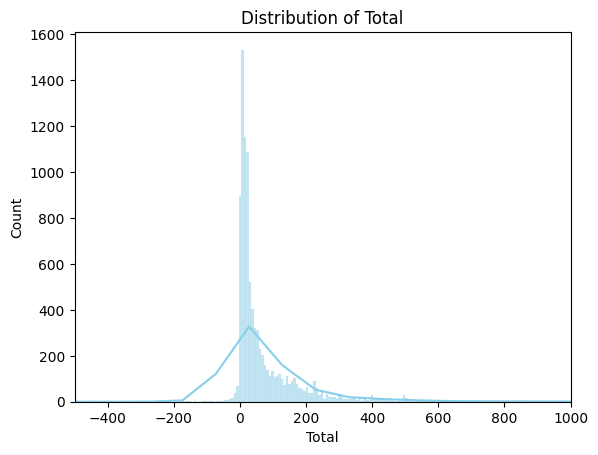

In [ ]:
sns.histplot(df['Total'],kde=True, color='skyblue')
plt.xlim(-500,1000)
plt.title('Distribution of Total')
plt.show()


In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test
shapiro_statistic, p_value = stats.shapiro(df["Total"])

print(f"Shapiro-Wilk Statistic: {shapiro_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Statistic: 0.18561828690646698
P-value: 9.207788030777092e-109


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9610.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Descriptive Statistics
def descriptive_statistics(df, column):
    print(f"Descriptive statistics for column: {column}")
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode())
    print("Standard Deviation:", df[column].std())
    print("Variance:", df[column].var())
    print("Minimum:", df[column].min())
    print("Maximum:", df[column].max())
    print("Range:", df[column].max() - df[column].min())
    print("25th Percentile:", df[column].quantile(0.25))
    print("50th Percentile (Median):", df[column].quantile(0.50))
    print("75th Percentile:", df[column].quantile(0.75))
    print("Skewness:", df[column].skew())
    print("Kurtosis:", df[column].kurt())
column = "Total"
descriptive_statistics(df, column)

Descriptive statistics for column: Total
Mean: 100.6490395421436
Median: 25.575000000000003
Mode: 0    20.0
Name: Total, dtype: float64
Standard Deviation: 411.46920907026345
Variance: 169306.9100129082
Minimum: -4707.0
Maximum: 15340.8
Range: 20047.8
25th Percentile: 10.0
50th Percentile (Median): 25.575000000000003
75th Percentile: 90.0
Skewness: 16.857842924932452
Kurtosis: 414.38949575812796


In [ ]:
summary_stats = df.groupby('Service Area')['Total'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Displaying the summary statistics
print(summary_stats)

                                       mean   median          std      min  \
Service Area                                                                 
Adults and Communities           153.226387  105.000   223.301837   -16.22   
Assurance                         70.462642   12.510   325.407521 -1315.20   
CSG Managed Budget              1971.842778  630.900  2436.480313   -44.99   
Children's Education & Skills     95.407741   19.170   141.041386  -301.35   
Children's Family Services        65.552035   23.430   126.926141  -971.70   
Children's Service DSG           128.391602   60.000   171.468917   -50.69   
Childrens Services                70.626245   23.080   215.164655  -500.00   
Commercial                       304.783333  262.750   437.660009  -450.00   
Commissioning                    161.574419   58.625   370.555280  -780.00   
Control Accounts                  23.838750    8.135    31.462986     3.06   
Corporate Accounting             132.982500  144.990    70.00386

<ipython-input-234-823aac68e9c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Service Area", y="Total", data=df, palette='rainbow', showfliers=True)


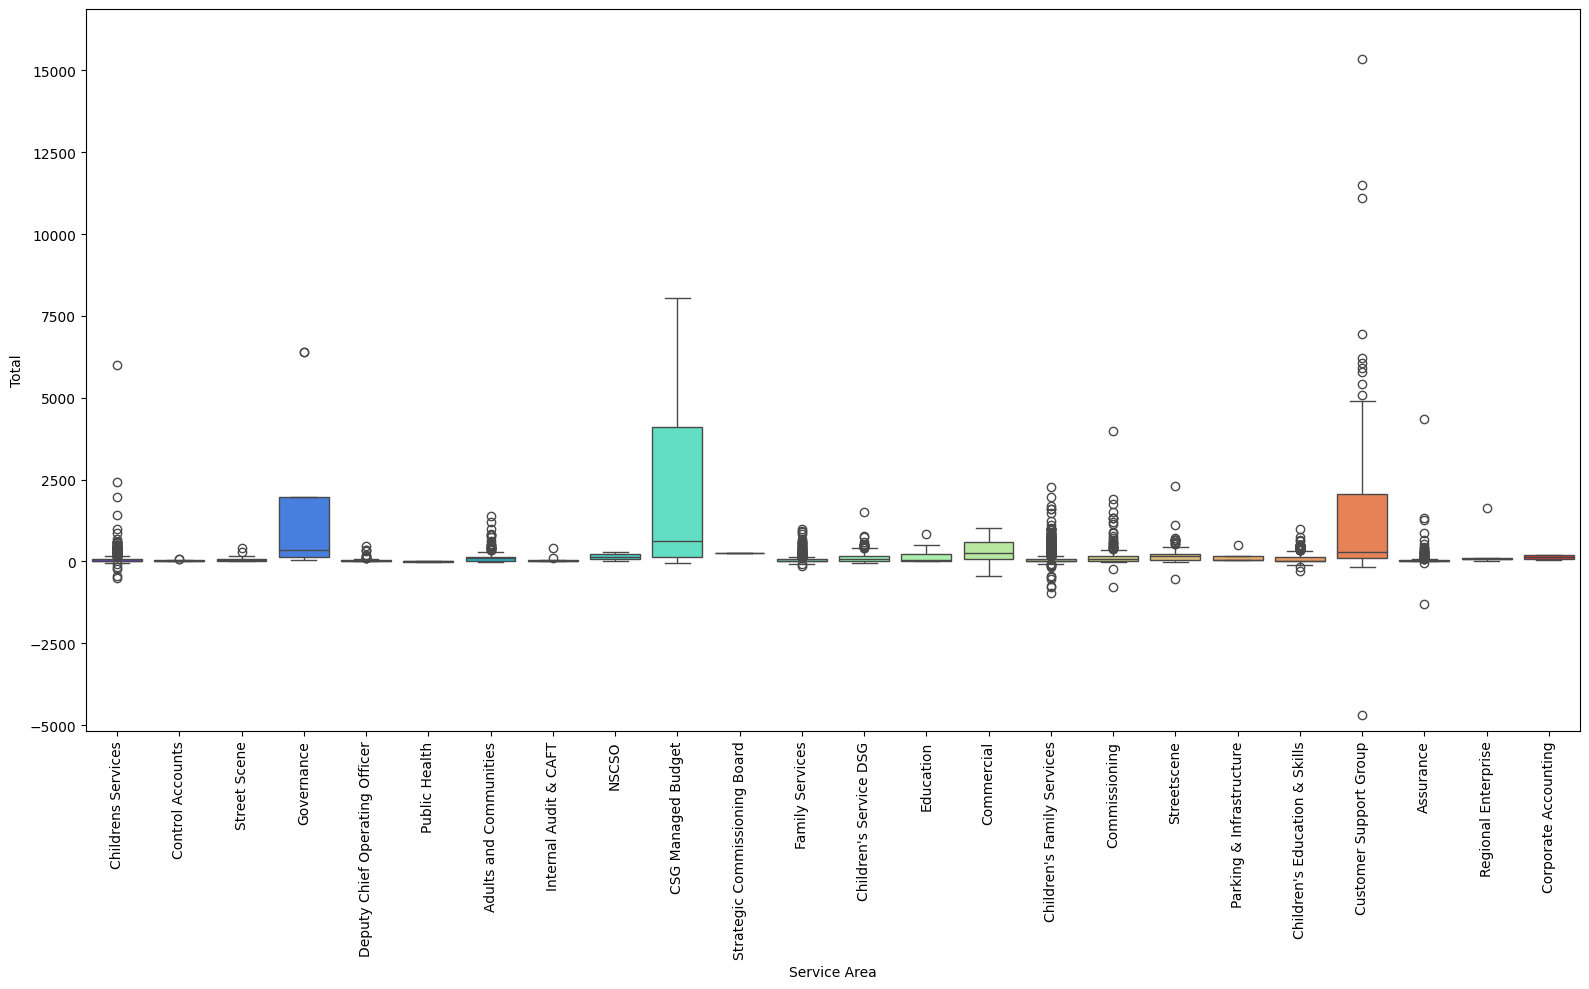

In [ ]:

plt.figure(figsize=(16, 10))
sns.boxplot(x="Service Area", y="Total", data=df, palette='rainbow', showfliers=True)

plt.xticks(rotation=90)

plt.ylim(df['Total'].min() * 1.1, df['Total'].max() * 1.1)

plt.tight_layout()

plt.show()


In [ ]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the values that are outliers
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = df.groupby('Service Area')['Total'].apply(find_outliers).reset_index()

# Drop rows where there are no outliers
outliers = outliers.dropna()
print(outliers)
# Display the outliers for each service area
#import ace_tools as tools;
#tools.display_dataframe_to_user(name="Outliers by Service Area", dataframe=outliers)

                Service Area  level_1   Total
0     Adults and Communities      214  815.50
1     Adults and Communities      215  815.50
2     Adults and Communities      307  400.00
3     Adults and Communities      524  411.00
4     Adults and Communities      877  354.00
...                      ...      ...     ...
1007             Streetscene     9561  583.12
1008             Streetscene     9565  652.50
1009             Streetscene     9568  652.50
1010             Streetscene     9572  652.50
1011             Streetscene     9575  652.50

[1012 rows x 3 columns]


In [ ]:
#plt.subplot(nrows,ncols,plot_number)
#plt.subplot(1,2,1)
#sns.countplot(x='Service Area',data=df3,palette='rainbow')
#plt.subplot(1,2,2)
#sns.countplot(x='Creditor',data=df3, palette='rainbow')

There is not missing value here

In [ ]:
df['Account Description'].value_counts()

,count
Account Description,
Equipment and Materials Purcha,2075
Food Costs,1792
Travelling Expenses,923
Other Transfer Payments to Soc,564
Other Services,538
...,...
Fixtures and fittings,1
Gas,1
Employer's National Insurance,1


In [ ]:
df['Account Description'].value_counts().idxmax()

'Equipment and Materials Purcha'

In [ ]:
df['Account Description'].value_counts().max()

2075

In [ ]:
df['Account Description'].value_counts().idxmin()

'Catering Recharge'

In [ ]:
df['Account Description'].value_counts().min()

1

In [ ]:
expenses=df[df['Total'] > 0]
Total_expenses= expenses['Total'].sum()
print(Total_expenses)

986188.04


###Refund Analysis

In [ ]:
refunds =df[df['Total']<0]
print(refunds)

                    Service Area     Account Description  \
22            Childrens Services              Food Costs   
119           Childrens Services  Miscellaneous Expenses   
164           Childrens Services              Food Costs   
269           Childrens Services              Food Costs   
282           Childrens Services              Food Costs   
...                          ...                     ...   
9777  Children's Family Services              Food Costs   
9872      Customer Support Group          Equipment Hire   
9873      Customer Support Group          Equipment Hire   
9915  Children's Family Services              Food Costs   
9948  Children's Family Services              Food Costs   

                              Creditor Transaction Date  Journal Reference  \
22                  ASDA HOME DELIVERY       2014-04-15                 50   
119                GRO HM PASSPORT OFF       2014-04-16                279   
164                  JS ONLINE GROCERY       

In [ ]:
refunds_by_service = refunds.groupby('Service Area')['Total'].sum()
print(refunds_by_service)

Service Area
Adults and Communities            -16.22
Assurance                       -1365.19
CSG Managed Budget                -44.99
Children's Education & Skills    -930.44
Children's Family Services      -6873.29
Children's Service DSG            -96.96
Childrens Services              -1794.09
Commercial                       -450.00
Commissioning                   -1049.80
Customer Support Group          -5159.80
Family Services                  -616.54
Public Health                     -13.30
Streetscene                      -540.15
Name: Total, dtype: float64


In [ ]:
refunds_by_account = refunds.groupby('Account Description')['Total'].sum()
print(refunds_by_account)

Account Description
Books-CDs-Audio-Video             -144.68
Building Repairs & Maintenance    -583.28
Cleaning and domestic material     -49.86
Conference Expenses               -178.80
Consumable Catering Supplies       -66.55
E25 - Catering Supplies             -1.05
Education CFR Administrative S     -65.83
Equipment Hire                    -274.00
Equipment and Materials Purcha   -4352.37
Fixtures and fittings            -1315.20
Food Costs                       -1192.44
Hardware Purchases                  -6.00
IT Services                        -19.40
Legal and Court Fees             -4903.45
Miscellaneous Expenses            -400.48
Other Services                    -997.62
Other Transfer Payments to Soc    -597.66
Other Vehicle Costs                -49.99
Private Contractors - Third Pa   -1198.11
Professional Services             -780.00
Stationery                       -1129.18
Training                           -16.22
Travelling Expenses               -128.60
Vehicle Runnin

In [ ]:
refunds_by_Creditor = refunds.groupby('Creditor')['Total'].sum()
print(refunds_by_Creditor)

Creditor
 Sainsburys S/mkts        -50.00
AMAZON EU                -835.29
AMAZON PRIME              -65.83
AMAZON UK MARKETPLACE    -299.36
AO RETAIL LIMITED         -30.00
                           ...  
WWW.DOORCONTROLSDIR       -88.14
WWW.EUREKADIRECT.CO.UK    -13.20
WWW.FLEETMINICABS.C       -69.25
WWW.JOHNLEWIS.COM        -101.00
WWW.QVCUK.COM             -27.95
Name: Total, Length: 93, dtype: float64


In [ ]:
refunds=df[df['Total'] < 0]
Total_refunds= refunds['Total'].sum()
print(Total_refunds)

-18950.77


In [ ]:
refunds.shape

(283, 6)

##Adding minus and positive

In [ ]:
#df.to_csv('clean_df3.csv')

In [ ]:
df.sort_values(by=['Service Area', 'Account Description', 'Creditor', 'Transaction Date'], inplace=True)

# Create a copy of the dataframe to track rows to drop
df_to_drop = pd.DataFrame()

for index, row in df.iterrows():
    if pd.notnull(row['Total']) and isinstance(row['Total'], (int, float)) and row['Total'] < 0:
        # Find matching rows with the same Service Area, Account Description, Creditor, and Date condition
        matching_rows = df[(df['Service Area'] == row['Service Area']) &
                           (df['Account Description'] == row['Account Description'])
                           &
                           (df['Transaction Date'] <= row['Transaction Date'])]
                          # (df['Creditor'] == row['Creditor'])
        if not matching_rows.empty:
            # Assume the first matching row is the counterpart
            positive_index = matching_rows.index[0]

            # Mark both positive and negative rows to be removed
            df_to_drop = pd.concat([df_to_drop, df.loc[[index, positive_index]]])

# Drop the rows from the original dataset
df_cleaned = df.drop(df_to_drop.index)

# Output the cleaned dataset
print("Cleaned Data:")
print(df_cleaned)

<ipython-input-249-5fe5e8eeff2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Service Area', 'Account Description', 'Creditor', 'Transaction Date'], inplace=True)


Cleaned Data:
                Service Area    Account Description             Creditor  \
3367  Adults and Communities  Books-CDs-Audio-Video            Amazon EU   
3368  Adults and Communities  Books-CDs-Audio-Video            Amazon EU   
3391  Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
3742  Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
3741  Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
...                      ...                    ...                  ...   
8116             Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
8117             Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
9566             Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
9568             Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
4104             Streetscene  Vehicle Running Costs   WWW.METROLINE.CO.U   

     Transaction Date  Journal Reference   Total  
3367       2014-12-11 

In [ ]:
refund_1=df[df['Total']<0]
print(refund_1)
refund_1.to_csv("refund.csv")

                       Service Area             Account Description  \
4614         Adults and Communities                        Training   
8617                      Assurance           Fixtures and fittings   
8646                      Assurance             Other Vehicle Costs   
843              CSG Managed Budget           Books-CDs-Audio-Video   
3914  Children's Education & Skills    Consumable Catering Supplies   
...                             ...                             ...   
1709                Family Services             Travelling Expenses   
833                   Public Health           Books-CDs-Audio-Video   
4176                    Streetscene           Books-CDs-Audio-Video   
3423                    Streetscene  Building Repairs & Maintenance   
4217                    Streetscene  Equipment and Materials Purcha   

                                 Creditor Transaction Date  Journal Reference  \
4614                            AMAZON EU       2015-08-31        

In [ ]:
df_cleaned.to_csv('cleaned_data_noduplicat_norefund.csv', index=False)

In [ ]:
df=df_cleaned

In [ ]:
df.shape

(9261, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9261 entries, 3367 to 4104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         9261 non-null   object        
 1   Account Description  9261 non-null   object        
 2   Creditor             9261 non-null   object        
 3   Transaction Date     9261 non-null   datetime64[ns]
 4   Journal Reference    9261 non-null   int64         
 5   Total                9261 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 506.5+ KB


In [ ]:
df.head(5)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
3367,Adults and Communities,Books-CDs-Audio-Video,Amazon EU,2014-12-11,4189,231.90
3368,Adults and Communities,Books-CDs-Audio-Video,Amazon EU,2014-12-11,4190,117.21
3391,Adults and Communities,Books-CDs-Audio-Video,Amazon Mktplce EU-U,2014-12-22,4191,30.80
3742,Adults and Communities,Books-CDs-Audio-Video,Amazon Mktplce EU-U,2015-01-12,4574,18.67
3741,Adults and Communities,Books-CDs-Audio-Video,Amazon Mktplce EU-U,2015-01-14,4575,47.43


In [ ]:
summary_stats = df.groupby('Service Area')['Total'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Displaying the summary statistics
print(summary_stats)

                                       mean   median          std     min  \
Service Area                                                                
Adults and Communities           154.600588  105.000   224.316876    3.29   
Assurance                         76.779177   12.520   314.905001    0.37   
CSG Managed Budget              2088.306765  729.000  2458.574721    4.86   
Children's Education & Skills     98.204543   19.170   140.216984    0.24   
Children's Family Services        69.359722   25.300   125.676430    0.00   
Children's Service DSG           129.537257   60.600   170.533715    1.10   
Childrens Services                73.090294   23.400   216.257972    0.55   
Commercial                       391.864286  262.750   384.816592   15.00   
Commissioning                    166.462869   59.000   368.014127    0.29   
Control Accounts                  23.838750    8.135    31.462986    3.06   
Corporate Accounting             132.982500  144.990    70.003861   50.00   

In [ ]:
refunds_1 =df[df['Total']<0]
print(refunds_1)

                    Service Area             Account Description  \
8617                   Assurance           Fixtures and fittings   
3117  Children's Family Services  Private Contractors - Third Pa   
833                Public Health           Books-CDs-Audio-Video   

                                 Creditor Transaction Date  Journal Reference  \
8617  MARQUEE CARPETS LIMITEWALTHAM CROSS       2016-08-19               9175   
3117                             HSS HIRE       2014-11-06               3745   
833                   Amazon Mktplce EU-U       2014-06-03               1192   

        Total  
8617 -1315.20  
3117   -32.08  
833    -13.30  


In [ ]:
df.head(10)

,Service Area,transaction_count,average_jv_value,median_jv_value,total_jv_value,Cluster
0,Adults and Communities,162,153.057469,105.000,24795.31,0
1,Assurance,243,76.779177,12.520,18657.34,0
2,CSG Managed Budget,38,2244.011316,997.500,85272.43,2
3,Children's Education & Skills,624,97.843958,19.170,61054.63,0
4,Children's Family Services,5082,69.048605,25.160,350905.01,1
5,Children's Service DSG,237,132.493966,65.590,31401.07,0
6,Childrens Services,1282,73.374961,23.475,94066.70,0
7,Commercial,7,391.864286,262.750,2743.05,0
8,Commissioning,250,166.433080,59.000,41608.27,0
9,Control Accounts,8,23.838750,8.135,190.71,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Service Area       24 non-null     object 
 1   transaction_count  24 non-null     int64  
 2   average_jv_value   24 non-null     float64
 3   median_jv_value    24 non-null     float64
 4   total_jv_value     24 non-null     float64
 5   Cluster            24 non-null     int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 1.2+ KB


#starting quarters

In [ ]:
df['Year'] = df['Transaction Date'].dt.year
df['Quarter'] = df['Transaction Date'].dt.to_period('Q')
df.head()

KeyError: 'Transaction Date'

In [ ]:
summary_df = df.groupby(['Service Area', 'Quarter']).agg(
    transaction_count=('Total', 'size'),
    average_transaction=('Total', 'mean'),
    sum_transaction=('Total', 'sum')
).reset_index()
summary_df.head()

KeyError: 'Quarter'

In [ ]:
print(summary_df.dtypes)

Service Area                  object
Quarter                period[Q-DEC]
transaction_count              int64
average_transaction          float64
dtype: object


In [ ]:
service_areas = summary_df['Service Area'].unique()
print(service_areas)

['Adults and Communities' 'Assurance' 'CSG Managed Budget'
 "Children's Education & Skills" "Children's Family Services"
 "Children's Service DSG" 'Childrens Services' 'Commercial'
 'Commissioning' 'Control Accounts' 'Corporate Accounting'
 'Customer Support Group' 'Deputy Chief Operating Officer' 'Education'
 'Family Services' 'Governance' 'Internal Audit & CAFT' 'NSCSO'
 'Parking & Infrastructure' 'Public Health' 'Regional Enterprise'
 'Strategic Commissioning Board' 'Street Scene' 'Streetscene']


In [ ]:
print(f"Number of unique service areas: {len(service_areas)}")

Number of unique service areas: 24


In [ ]:
summary_df['Quarter_str'] = summary_df['Quarter'].astype(str)

service_areas = summary_df['Service Area'].unique()

fig, axes = plt.subplots(6, 4, figsize=(20, 15))
axes = axes.flatten()

for i, service_area in enumerate(service_areas):
    service_area_data = summary_df[summary_df['Service Area'] == service_area]
    sns.lineplot(ax=axes[i], x='Quarter_str', y='sum_transaction', data=service_area_data, marker="o")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    axes[i].set_xlabel('Year-Quarter')
    axes[i].set_ylabel('sum_transaction')
    axes[i].set_title(f'Sum_Transaction Trends for {service_area}')

plt.tight_layout()
plt.savefig('Sum_Transaction.png')
plt.show()

<ipython-input-289-36faacb094c8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-289-36faacb094c8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-289-36faacb094c8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


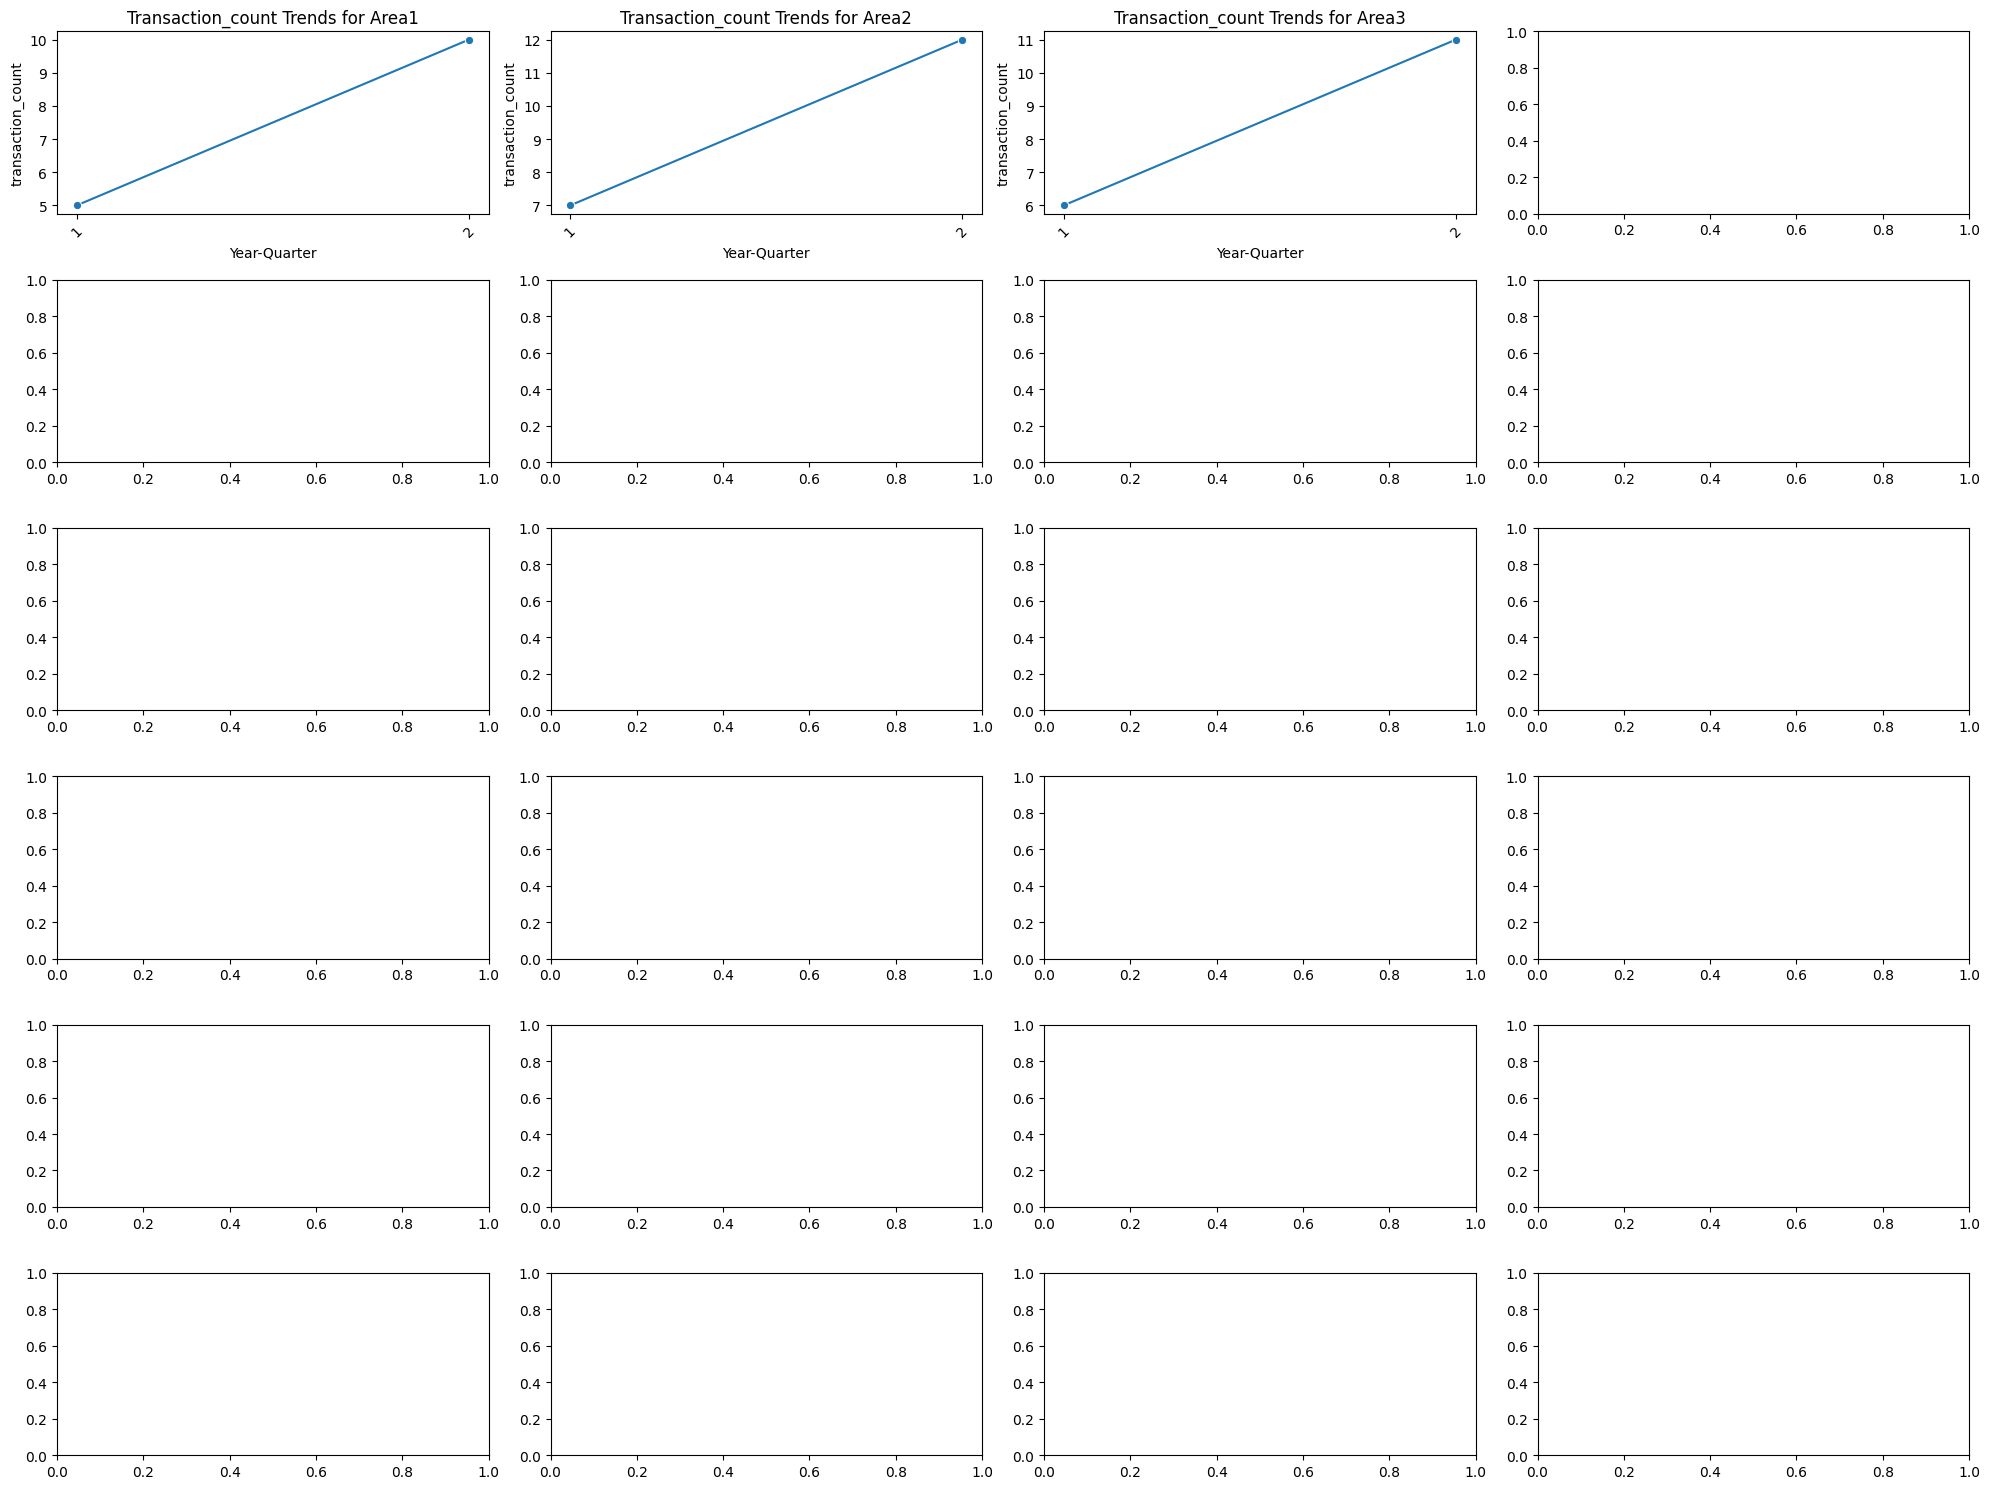

In [ ]:

service_areas = summary_df['Service Area'].unique()
fig, axes = plt.subplots(6, 4, figsize=(20, 15))
axes = axes.flatten()

for i, service_area in enumerate(service_areas):
    service_area_data = summary_df[summary_df['Service Area'] == service_area]
    sns.lineplot(ax=axes[i], x='Quarter_str', y='transaction_count', data=service_area_data, marker="o")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    axes[i].set_xlabel('Year-Quarter')
    axes[i].set_ylabel('transaction_count')
    axes[i].set_title(f'Transaction_count Trends for {service_area}')

plt.tight_layout()
plt.savefig('Transaction_count Trends.png')
plt.show()

<ipython-input-288-89c42133bf60>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-288-89c42133bf60>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-288-89c42133bf60>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-288-89c42133bf60>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


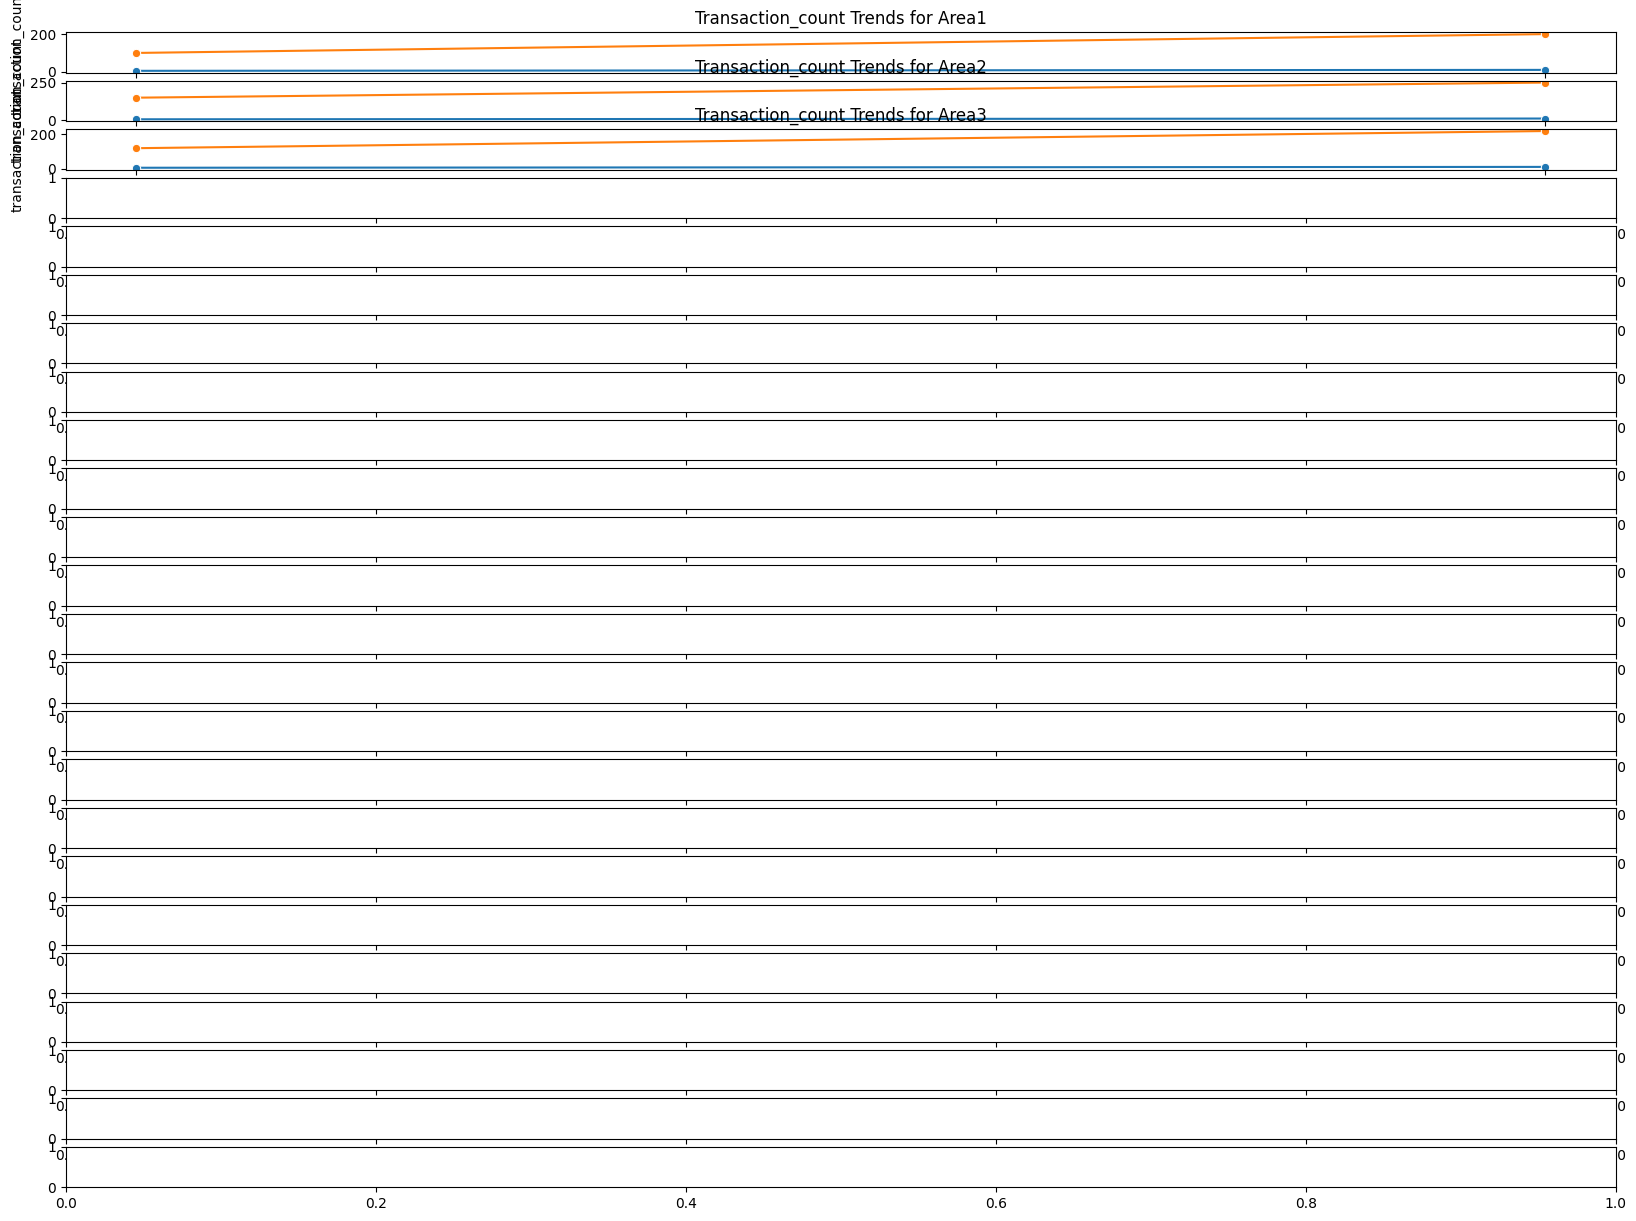

starting machine learning

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
service_area_stats = df.groupby('Service Area').agg(
    transaction_count=('Total', 'count'),
    average_jv_value=('Total', 'mean'),
    median_jv_value=('Total', 'median'),
    total_jv_value=('Total', 'sum')
).reset_index()

# Display the result
print(service_area_stats)

                      Service Area  transaction_count  average_jv_value  \
0           Adults and Communities                162        153.057469   
1                        Assurance                243         76.779177   
2               CSG Managed Budget                 38       2244.011316   
3    Children's Education & Skills                624         97.843958   
4       Children's Family Services               5082         69.048605   
5           Children's Service DSG                237        132.493966   
6               Childrens Services               1282         73.374961   
7                       Commercial                  7        391.864286   
8                    Commissioning                250        166.433080   
9                 Control Accounts                  8         23.838750   
10            Corporate Accounting                  4        132.982500   
11          Customer Support Group                 91       1686.207253   
12  Deputy Chief Operatin

In [ ]:
service_area_stats.head()

,Service Area,transaction_count,average_jv_value,median_jv_value,total_jv_value
0,Adults and Communities,162,153.057469,105.00,24795.31
1,Assurance,243,76.779177,12.52,18657.34
2,CSG Managed Budget,38,2244.011316,997.50,85272.43
3,Children's Education & Skills,624,97.843958,19.17,61054.63
4,Children's Family Services,5082,69.048605,25.16,350905.01


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

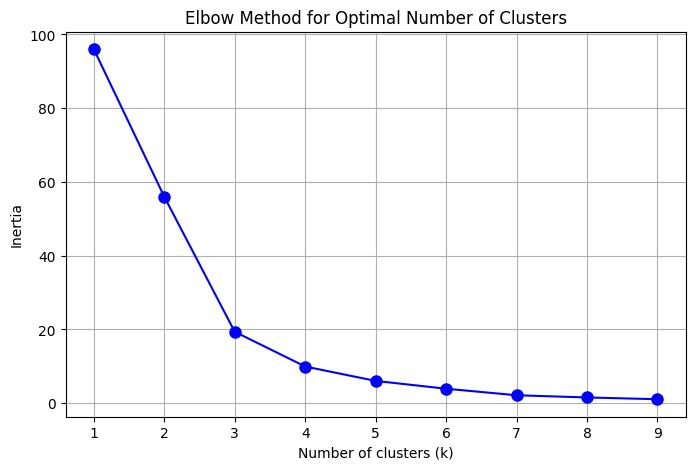

In [ ]:
df = pd.DataFrame(service_area_stats)

# Selecting columns for similarity measurement
features = ['transaction_count', 'average_jv_value', 'median_jv_value', 'total_jv_value']

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])

# Elbow method to determine optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


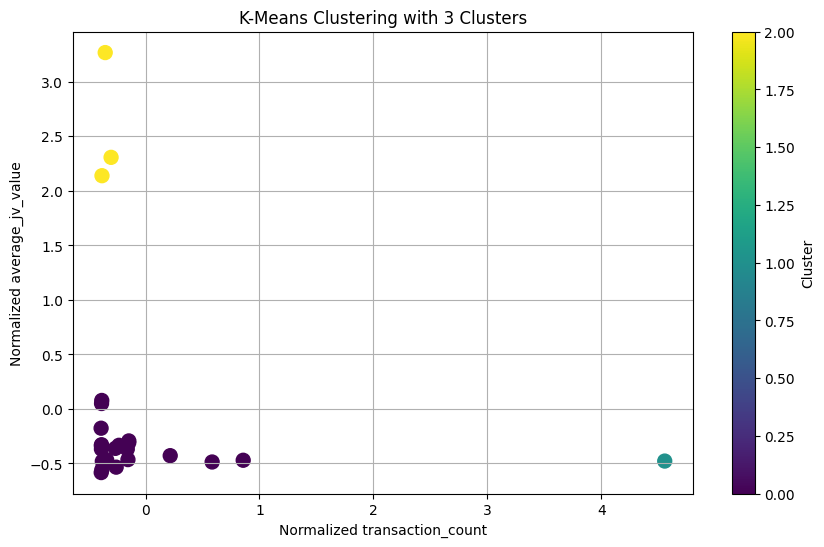

                      Service Area  Cluster
0           Adults and Communities        0
1                        Assurance        0
2               CSG Managed Budget        2
3    Children's Education & Skills        0
4       Children's Family Services        1
5           Children's Service DSG        0
6               Childrens Services        0
7                       Commercial        0
8                    Commissioning        0
9                 Control Accounts        0
10            Corporate Accounting        0
11          Customer Support Group        2
12  Deputy Chief Operating Officer        0
13                       Education        0
14                 Family Services        0
15                      Governance        2
16           Internal Audit & CAFT        0
17                           NSCSO        0
18        Parking & Infrastructure        0
19                   Public Health        0
20             Regional Enterprise        0
21   Strategic Commissioning Boa

In [ ]:
# Optional: Use the optimal number of clusters (determined from elbow) for K-means clustering
optimal_k = 3  # Example: You will set this based on the elbow point from the graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Normalized transaction_count')
plt.ylabel('Normalized average_jv_value')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Displaying the resulting DataFrame
print(df[['Service Area', 'Cluster']])